`# TODO:`

* Documentation of this notebook


In [1]:
import pandas as pd
from gaishap import GenAIExplainer
import shap

In [2]:
shap.initjs()

In [3]:
df_test_dataset = pd.read_json('./test-dataset.json', orient='records')
df_test_dataset.sample(5)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall
192,"From Amazon's Q3 2023 10-Q, how does the opera...",[Table of Contents\nOperating Expenses\nInform...,The operational expenses section provides deta...,The operational expenses section in Amazon's Q...,0.333333,1.0,0.125000
2,Has there been any significant change in Apple...,[Operating Expenses\nOperating expenses for th...,"Yes, there has been a significant change in Ap...","Yes, there has been a change in Apple's operat...",1.000000,1.0,0.555556
124,Were there any significant business acquisitio...,[Table of Contents\nA Quarter in Review\nTotal...,"In the Q2 2023 report, there were no significa...","Yes, Intel mentioned a significant business ac...",1.000000,0.0,0.000000
69,How did Apple's operating expenses for Q1 2023...,[Operating Expenses\nOperating expenses for th...,"For Q1 2023, Apple's operating expenses includ...",Apple's operating expenses for Q1 2023 were $1...,1.000000,0.0,0.000000
140,What do the inventory levels reported in Amazo...,[Table of Contents\nItem 2. Management’s Discu...,The inventory levels reported in Amazon's Q3 2...,The inventory levels reported in Amazon's Q3 2...,0.500000,1.0,0.600000


In [4]:
df_features = pd.read_json('./test-features.json', orient='records')
df_features.sample(5)

,there_is_any_company_indentified_in_the_question,list_of_companies_identified_in_the_question,there_is_any_business_segment_indentified_in_the_question,list_of_business_segments_identified_in_the_question,there_is_any_financial_metric_identified_in_the_question,list_if_financial_metrics_identified_in_the_question,there_is_any_specific_quarter_identified_in_the_question,list_of_quarters_identified_in_the_question,is_a_comparison_question,is_a_question_about_trends_or_changes_over_time,is_a_question_about_identification_of_factors_or_insights,is_a_question_related_to_the_notes_section
179,True,[Intel],False,[],True,[operational expenses],True,[Q3 2023],True,False,True,False
68,True,[Apple],False,[],True,[gross margin],True,[latest 10-Q],False,False,False,False
10,True,[Apple],False,[],True,[effective tax rate],True,[these quarters],True,False,False,False
15,True,[Microsoft],False,[],True,[inventory levels],True,[these quarters],False,True,True,False
86,True,[Microsoft],True,"[cloud services, Azure]",True,[revenue],False,[],False,False,False,False


In [5]:
df_test_dataset.join(df_features).sample(5)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall,there_is_any_company_indentified_in_the_question,list_of_companies_identified_in_the_question,there_is_any_business_segment_indentified_in_the_question,list_of_business_segments_identified_in_the_question,there_is_any_financial_metric_identified_in_the_question,list_if_financial_metrics_identified_in_the_question,there_is_any_specific_quarter_identified_in_the_question,list_of_quarters_identified_in_the_question,is_a_comparison_question,is_a_question_about_trends_or_changes_over_time,is_a_question_about_identification_of_factors_or_insights,is_a_question_related_to_the_notes_section
163,"For NVIDIA's Q1 2023 10-Q, what is the relatio...",[ITEM 2. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,The context does not provide specific details ...,"In NVIDIA's Q1 2023 10-Q, the relationship bet...",0.285714,0.0,0.0,True,[NVIDIA],True,[GPU technologies or services],True,[R&D spending],True,[Q1 2023],False,False,True,False
103,How did exchange rate changes impact NVIDIA's ...,[PART I. FINANCIAL INFORMATION\nITEM 1. FINANC...,The provided financial statements do not inclu...,The impact of derivative financial instruments...,0.500000,0.0,0.0,True,[NVIDIA],False,[],True,[exchange rate changes],True,[latest 10-Q],False,False,True,False
89,How much has Microsoft invested in research an...,[PART IItem 2\n \nITEM 2. MANAGEMENT’S DISCUSS...,The specific amount Microsoft invested in rese...,"In the first quarter of 2023, Microsoft Corpor...",1.000000,0.0,0.0,True,[Microsoft],False,[],True,[research and development],True,[Q1 2023],False,False,True,False
128,What was Amazon's gross margin in the most rec...,"[Table of Contents\nAMAZON.COM, INC.\nCONSOLID...",To calculate Amazon's gross margin from the mo...,Amazon's gross margin for the most recent quar...,0.000000,0.0,0.0,True,[Amazon],False,[],True,[gross margin],True,[most recent 10-Q],False,False,False,False
79,What effective tax rate did Apple report in it...,[Operating Expenses\nOperating expenses for th...,Apple reported an effective tax rate of 12.5% ...,Apple reported an effective tax rate of 12.5% ...,1.000000,1.0,0.5,True,[Apple],False,[],True,[effective tax rate],True,[latest quarterly filing],True,False,False,False


In [6]:
bb_model = GenAIExplainer.from_pandas(df_test_dataset, df_features)

In [7]:
pd.DataFrame(bb_model.metrics)

,faithfulness,context_precision,context_recall
0,1.000000,1.0,0.625000
1,0.916667,1.0,1.000000
2,1.000000,1.0,0.555556
3,0.333333,0.0,0.500000
4,0.500000,0.5,0.857143
...,...,...,...
190,1.000000,1.0,0.400000
191,1.000000,1.0,0.571429
192,0.333333,1.0,0.125000
193,1.000000,0.0,0.000000


In [8]:
pd.DataFrame(bb_model.features)

,there_is_any_company_indentified_in_the_question,list_of_companies_identified_in_the_question,there_is_any_business_segment_indentified_in_the_question,list_of_business_segments_identified_in_the_question,there_is_any_financial_metric_identified_in_the_question,list_if_financial_metrics_identified_in_the_question,there_is_any_specific_quarter_identified_in_the_question,list_of_quarters_identified_in_the_question,is_a_comparison_question,is_a_question_about_trends_or_changes_over_time,is_a_question_about_identification_of_factors_or_insights,is_a_question_related_to_the_notes_section
0,True,[Apple],False,[],True,[total net sales],False,[],False,True,False,False
1,True,[Apple],False,[],True,[gross margin],True,[most recent 10-Q],True,False,True,False
2,True,[Apple],False,[],True,[operating expenses],False,[],False,True,True,False
3,True,[Apple],True,[iPhone],True,[revenue],False,[],False,True,False,False
4,True,[Apple],True,[Services segment],True,[revenue],False,[],False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,[Amazon],False,[],True,"[debt, financing instruments]",True,[Q1 2023],True,False,False,False
191,True,[Amazon],False,[],True,[effective tax rate],True,[most recent 10-Q],True,False,False,True
192,True,[Amazon],False,[],True,[operational expenses],True,[Q3 2023],True,False,True,False
193,True,[Amazon],False,[],True,"[revenue, marketing and advertising expenses]",True,[latest 10-Q],True,False,False,False


In [9]:
bb_model.feature_engineering()

In [10]:
pd.DataFrame(bb_model.preprocessed_features)

,list_of_companies_identified_in_the_question__amazon,list_of_companies_identified_in_the_question__apple,list_of_companies_identified_in_the_question__microsoft,list_of_companies_identified_in_the_question__intel,list_of_companies_identified_in_the_question__nvidia,there_is_any_business_segment_indentified_in_the_question,list_of_business_segments_identified_in_the_question__semiconductor,list_of_business_segments_identified_in_the_question__international_markets,list_of_business_segments_identified_in_the_question__azure,list_of_business_segments_identified_in_the_question__windows,...,list_of_quarters_identified_in_the_question__these_quarters,list_of_quarters_identified_in_the_question__latest_quarterly_report,list_of_quarters_identified_in_the_question__q2_2023,list_of_quarters_identified_in_the_question__latest_10-q,list_of_quarters_identified_in_the_question__latest_quarter,list_of_quarters_identified_in_the_question__q2_2023_10-q,is_a_comparison_question,is_a_question_about_trends_or_changes_over_time,is_a_question_about_identification_of_factors_or_insights,is_a_question_related_to_the_notes_section
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
bb_model.create_explainers()

  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
bb_model.r2_scores_

{'faithfulness': 0.6791153514574415,
 'context_precision': 0.6179202452980952,
 'context_recall': 0.5993366543136025}

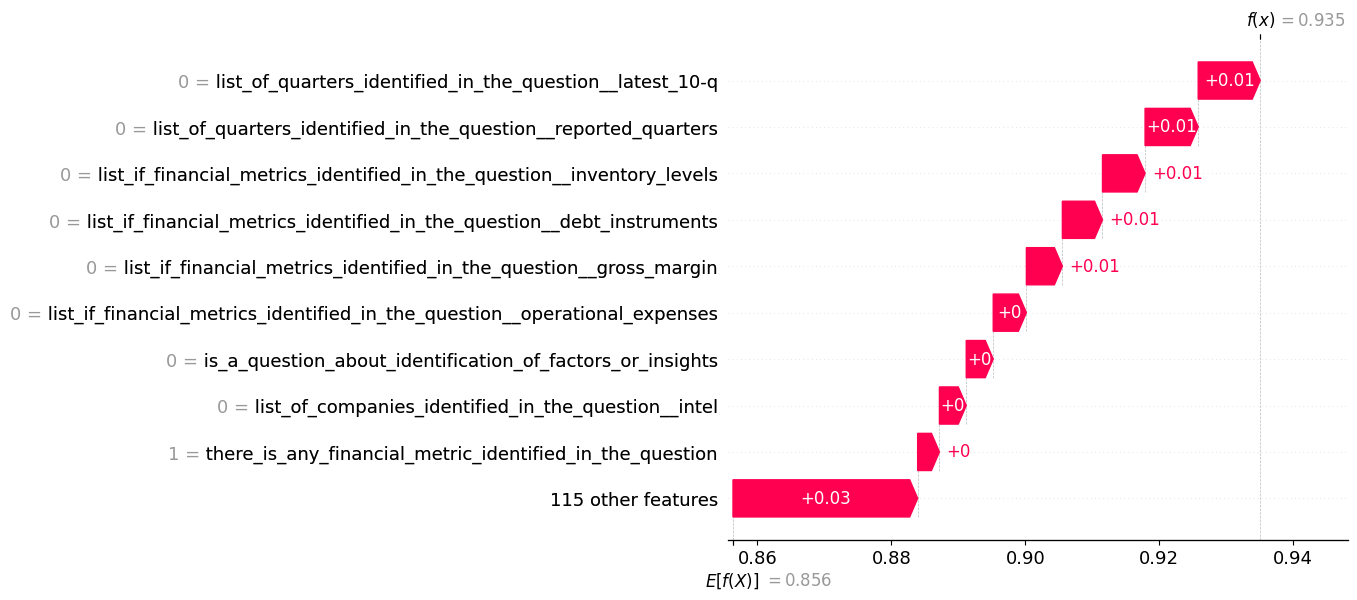

In [15]:
metric = 'faithfulness'

X = pd.DataFrame(bb_model.preprocessed_features)
explainer = bb_model.explainers_[metric]
shap_values = explainer(X)
shap.waterfall_plot(shap_values[0])

/Users/gpabon/src/repos/dstoolkit-genai-shap/.venv/lib/python3.9/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


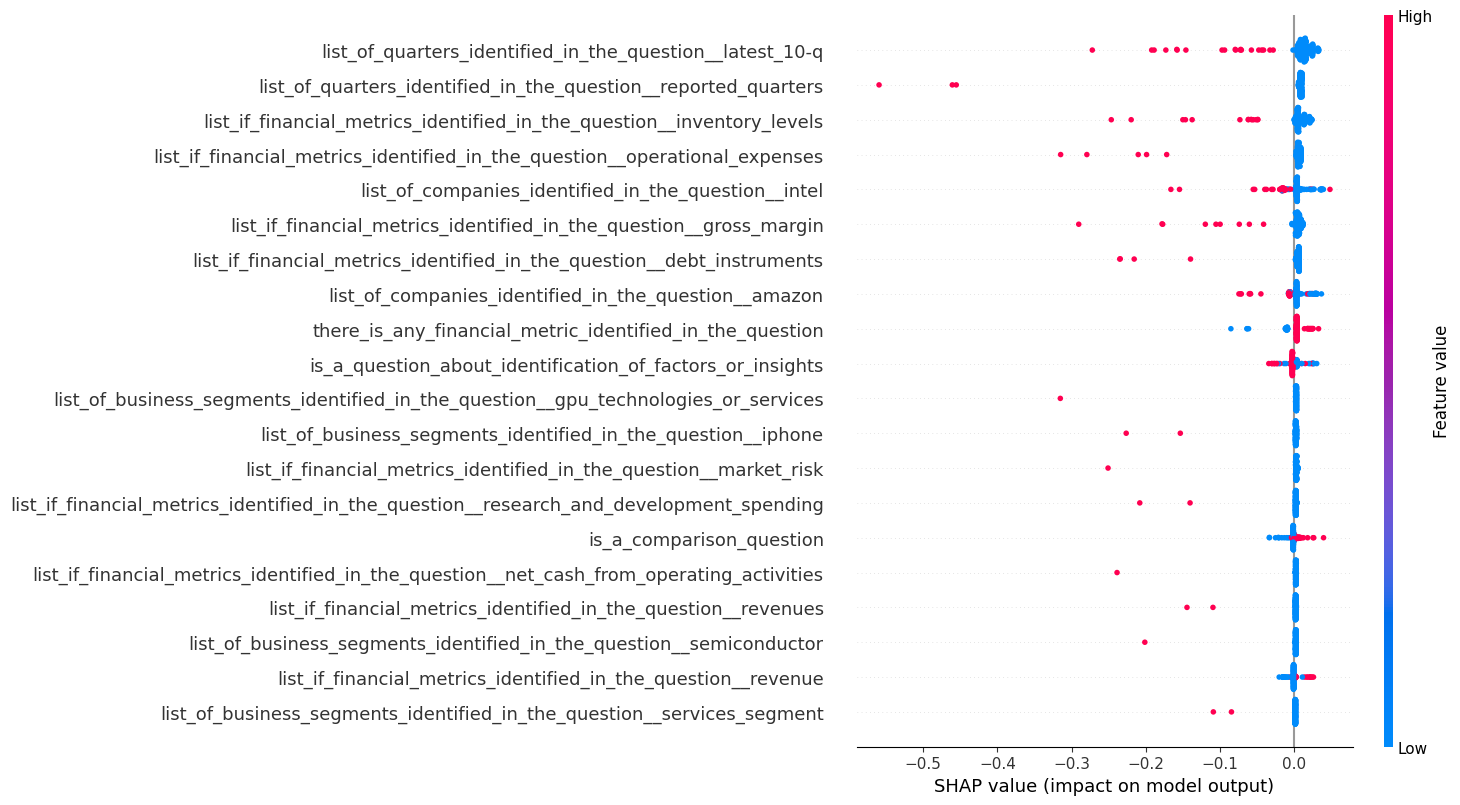

In [22]:
shap.summary_plot(shap_values, X)

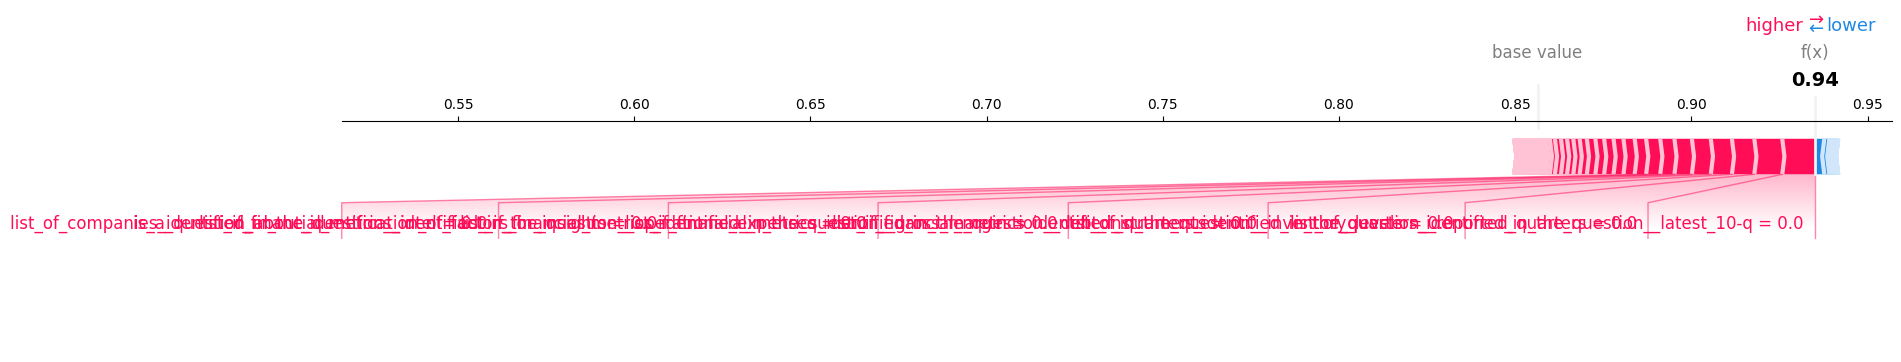

In [21]:
shap.force_plot(explainer.expected_value, shap_values.values[0], X.iloc[0, :], matplotlib=True)